In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 1: Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


In [15]:
# Step 2: Data Preprocessing
# Check for missing values
if X.isnull().sum().sum() > 0:
    X.fillna(X.mean(), inplace=True)

In [16]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
# Step 4: Model Selection and Training
# Hyperparameter Tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [19]:
# Best Model
best_model = grid_search.best_estimator_
print("Best Parameters for Decision Tree:", grid_search.best_params_)


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


In [20]:
# Additional Model: Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Step 5: Evaluation
# Predictions
y_pred_dt = best_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [22]:
# Metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
# Accuracy Comparison
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


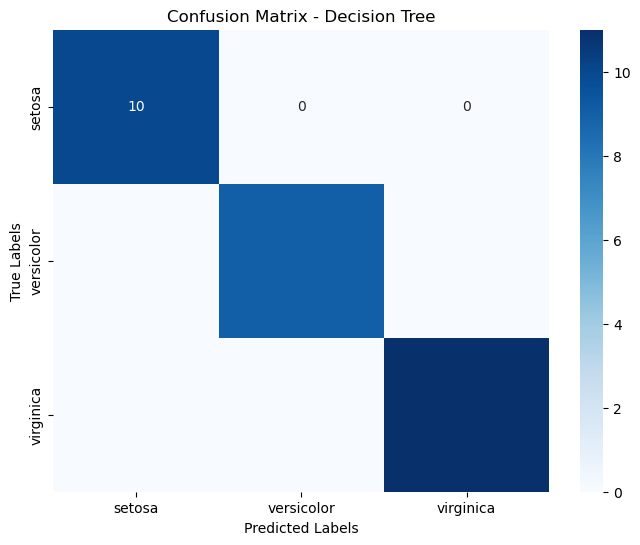

In [24]:
# Confusion Matrix for Best Model
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [25]:
# Step 6: Make Predictions on New Data
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input
new_data_scaled = scaler.transform(new_data)
new_prediction_dt = best_model.predict(new_data_scaled)
new_prediction_rf = rf_model.predict(new_data_scaled)
print(f"Predicted Class (Decision Tree): {data.target_names[new_prediction_dt[0]]}")
print(f"Predicted Class (Random Forest): {data.target_names[new_prediction_rf[0]]}")


Predicted Class (Decision Tree): setosa
Predicted Class (Random Forest): setosa


C:\Users\Pranjal\Downloads\Telegram Desktop\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


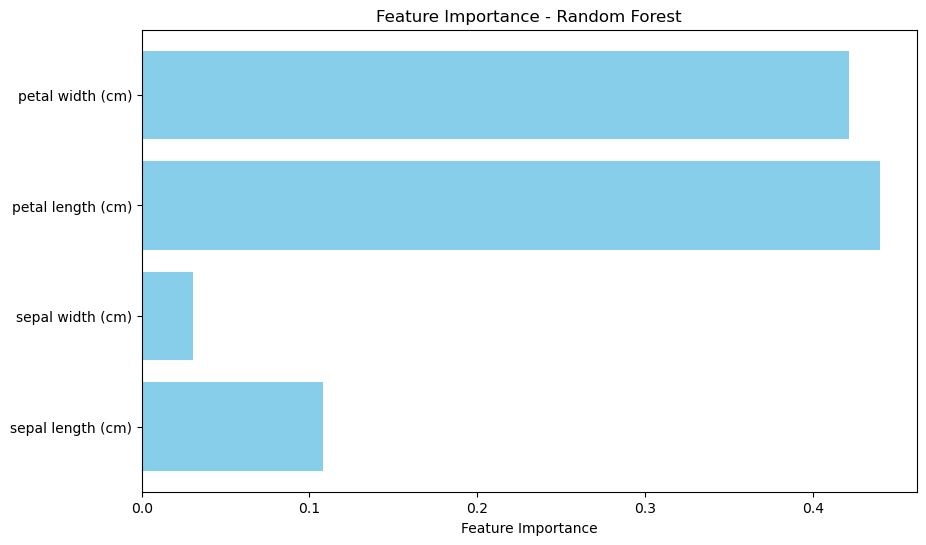

In [26]:
# Step 7: Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

In [27]:
# Step 8: Decision Tree Visualization
print("Decision Tree Structure:")
print(export_text(best_model, feature_names=list(data.feature_names)))


Decision Tree Structure:
|--- petal length (cm) <= -0.74
|   |--- class: 0
|--- petal length (cm) >  -0.74
|   |--- petal length (cm) <= 0.56
|   |   |--- petal width (cm) <= 0.59
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.59
|   |   |   |--- class: 2
|   |--- petal length (cm) >  0.56
|   |   |--- petal width (cm) <= 0.72
|   |   |   |--- petal length (cm) <= 0.68
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  0.68
|   |   |   |   |--- petal width (cm) <= 0.46
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  0.46
|   |   |   |   |   |--- petal length (cm) <= 0.96
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  0.96
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  0.72
|   |   |   |--- petal length (cm) <= 0.62
|   |   |   |   |--- sepal width (cm) <= 0.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  0.10
|   |   |   |   |   |--- class

In [28]:
app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Iris Classifier API! Use the /predict endpoint to classify new data."

@app.route('/predict', methods=['POST'])
def predict():
    try:
        input_data = request.json['data']  # Expecting JSON with 'data' key
        input_data_scaled = scaler.transform([input_data])
        prediction_dt = best_model.predict(input_data_scaled)[0]
        prediction_rf = rf_model.predict(input_data_scaled)[0]
        return jsonify({
            'Decision Tree Prediction': data.target_names[prediction_dt],
            'Random Forest Prediction': data.target_names[prediction_rf]
        })
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


NameError: name 'Flask' is not defined